In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [534]:
house_price= pd.read_csv(r'C:/Users/anand/Downloads/BostonHousing.csv')
house_price.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [535]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [536]:
print(house_price)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [537]:
house_price.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [538]:
house_price['chas'].value_counts()

chas
0    471
1     35
Name: count, dtype: int64

In [539]:
house_price.shape

(506, 14)

CHECKING MISSING VALUES

In [540]:
house_price_dataframe=pd.DataFrame(house_price)

In [541]:
house_price_dataframe.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

CORRELATION BETWEEN VARIOUS FEATURES IN THE DATASET

In [542]:
correlation=house_price.corr()

Text(0.5, 1.0, 'Heatmap Of Correlations')

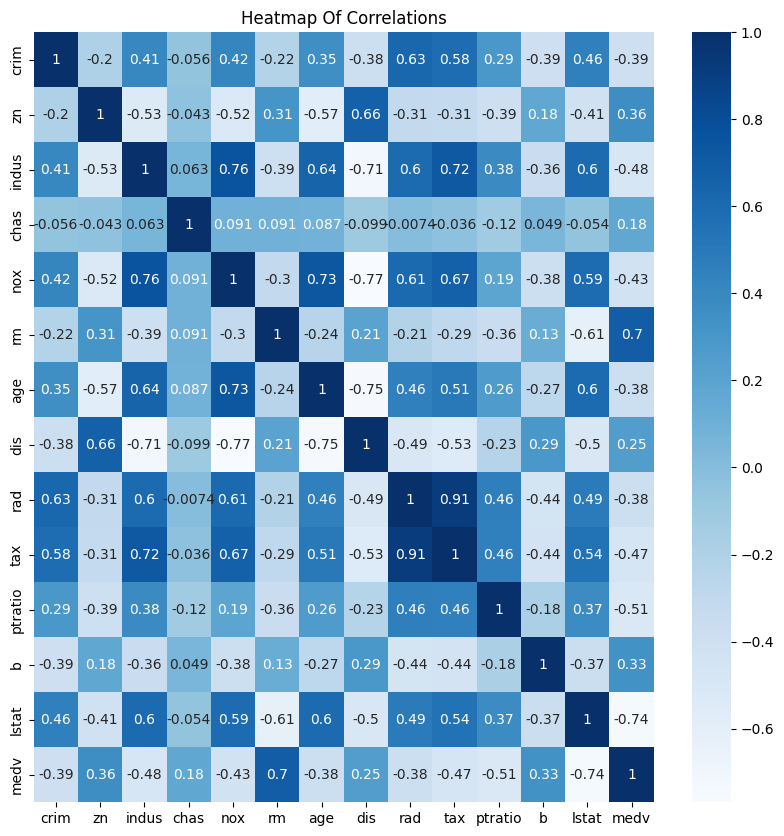

In [543]:
plt.figure(figsize=(10,10))
# sns.heatmap(correlation,cbar=True,square=True,fmt='.lf',annot=True,annot_kws={'size':8},cmap='Blues')
sns.heatmap(correlation, annot=True, cmap='Blues', cbar=True)
plt.title("Heatmap Of Correlations")

SPLITTING THE DATA

In [544]:
X=house_price.drop(['medv'],axis=1)
Y=house_price['medv']

In [545]:
print(X)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [546]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


In [547]:
chas=house_price['chas']

SPLIT THE DATA INTO TRAINING DATA AND TESTING DATA


In [548]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=chas)

In [549]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


MODEL TRAINING


In [550]:
model=XGBRegressor()

In [551]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

EVALUATION

PREDICTION ON TRAINING DATA

In [552]:
training_data_pred=model.predict(X_train)
print(training_data_pred)

[21.903725  24.512482  16.695002  23.104965  23.028446  17.208609
 24.409706  27.47145    9.525975  31.59387   16.302036  18.295076
  8.102849  34.894203  24.476358  13.397675  18.70522   19.106201
  5.6091948 20.502424  19.576378  17.185854  17.408562  27.506449
 23.900837  24.992907  12.706281  21.206182  14.795724  29.032932
 14.01977   16.61729   11.299382  13.313078  21.902336  29.594814
 23.401953  49.995213  31.69247   20.395012  21.438887  34.897247
 37.899338  10.373918  20.087854  13.800769  21.691904  25.003641
 22.189718   7.0068927 24.79758   22.802923  23.780542  28.697077
 14.331592  41.296173  21.699932  23.902494  32.899162  16.103884
 19.503805  19.8758    28.385593  21.002625  13.806085  31.591646
 50.002598  14.489783  26.602224  35.391613  22.002945  36.48965
 22.396967  10.49471   20.099726  29.809204  24.001638  15.198098
 16.121403  18.50538   29.59209    7.5089884 19.291393  18.69817
 24.808775  27.485338  30.532629  25.274355  29.779587  17.895065
 22.915806  

R SQUARED ERROR

In [553]:
R_squared_error_1=metrics.r2_score(Y_train,training_data_pred)
print("R Squared error:",R_squared_error_1)

R Squared error: 0.9999981361856507


MEAN ABSOLUTE ERROR

In [554]:
MEAN_absolute_error_1=metrics.mean_absolute_error(Y_train,training_data_pred)
print("Mean Absolute Error:",MEAN_absolute_error_1)

Mean Absolute Error: 0.00903843983565229


VISUALIZING THE ACTUAL PRICES AND PREDICTED PRICES

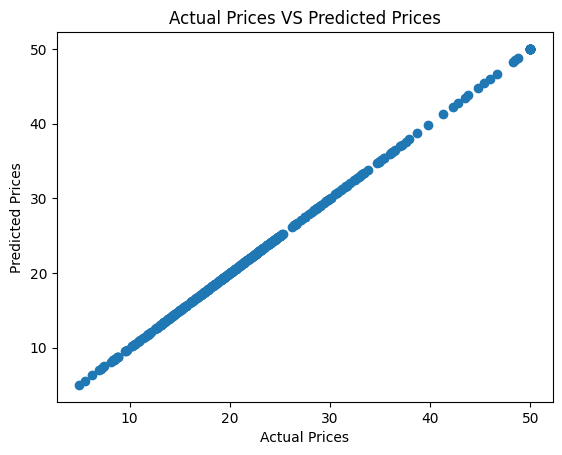

In [555]:
plt.scatter(Y_train,training_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

PREDICTION ON TEST DATA

In [556]:
testing_data_pred=model.predict(X_test)
print(testing_data_pred)

[22.526054 11.960422 26.212507 25.625221 17.492573 13.156452 18.536472
 16.897694 32.14214  43.56723  23.040375 14.591311 22.97887  25.21101
 18.716734 11.273966 29.577389 13.286437 23.784063 18.813236 19.762756
 19.555353 13.619926 21.765524 20.211048 29.668774 17.308128 32.727207
  8.962589 34.257347 22.211277 22.1884   24.182076 11.161076 22.100235
 10.66771  45.833366 23.889795 20.723436 38.684193 24.693975 29.88602
 20.345537 20.541647 20.287449 34.920223 42.288242 19.335598 19.419601
 20.81223  20.829117 12.926402 20.979391 17.277561 24.881744 32.28051
 42.82168  27.101604 19.185125 20.644808 49.22832   9.482495 19.205029
 25.655567 14.800673 30.603422 19.885141 18.747461 20.093945 35.432972
 29.121965 22.854065 21.977818 22.073889 36.139984 12.016948 13.844257
 19.813963 19.69122  20.553398 23.167253 19.506025 12.72355  22.586504
 20.529785 21.202688 11.882422 21.043541 20.370926 22.468086 18.148804
 27.651917  7.211002 25.760212 16.763783 28.81484  19.397898 30.595997
 13.18842

R SQUARED ERROR

In [557]:
R_squared_error_2=metrics.r2_score(Y_test,testing_data_pred)
print("R Squared Error:",R_squared_error_2)

R Squared Error: 0.886677481095346


MEAN ABSOLUTE ERROR

In [558]:
MEAN_absolute_error_2=metrics.mean_absolute_error(Y_test,testing_data_pred)
print("Mean Absolute Error:",MEAN_absolute_error_2)

Mean Absolute Error: 2.0657583545236027


VISUALIZING THE ACTUAL PRICES AND PREDICTED PRICES


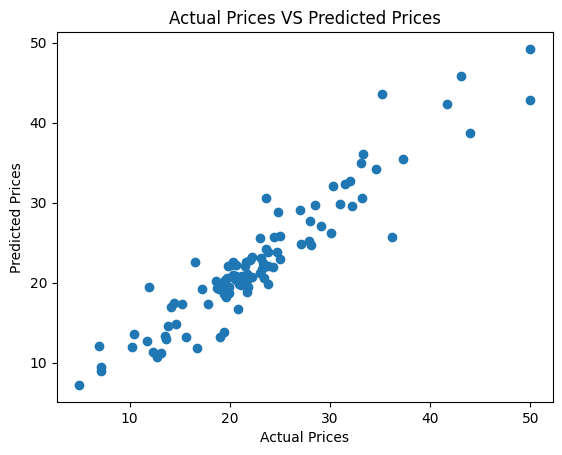

In [559]:
plt.scatter(Y_test,testing_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

In [ ]:
input_data=(0.08187,0,2.89,0,0.445,7.82,36.9,3.4952,2,276,18,393.53,3.57)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
scalar_prediction = prediction.item()
print(f"Price Of The House In Dollar Is: {scalar_prediction*1000:.2f} USD")

Price Of The House In Dollar Is: 43801.85 USD
